In [4]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"karimeltohamy","key":"7e808dc6fc4ede1f002817e5132ee859"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d alincijov/self-driving-cars

self-driving-cars.zip: Skipping, found more recently modified local copy (use --force to force download)
self-driving-cars.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('self-driving-cars.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

In [8]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import os                                   # For os commands (dir cwd etc)
import zipfile                              # for extracting data set files
                                 
import skimage                              # for scikit-learn image operations
import skimage.io
import skimage.transform
from matplotlib import pyplot as plt        # for visualizing data
import numpy as np                          # for numerical python
import random                               # for random sampling in range(),number_of_values
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf
import keras
import cv2

In [10]:
print(os.listdir('/content/files'))

['labels_trainval.csv', 'labels_train.csv', 'labels_val.csv', 'images']


In [11]:
original = pd.read_csv('/content/files/labels_trainval.csv')


In [12]:
df = original.copy()
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165105 entries, 0 to 165104
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   frame     165105 non-null  object
 1   xmin      165105 non-null  int64 
 2   xmax      165105 non-null  int64 
 3   ymin      165105 non-null  int64 
 4   ymax      165105 non-null  int64 
 5   class_id  165105 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 7.6+ MB


In [14]:
df.describe()

,xmin,xmax,ymin,ymax,class_id
count,165105.000000,165105.000000,165105.000000,165105.000000,165105.000000
mean,202.407607,235.747185,134.405705,163.565610,1.681033
std,114.850014,116.941637,20.423928,28.800355,1.311622
min,0.000000,3.000000,0.000000,0.000000,1.000000
25%,118.000000,150.000000,131.000000,152.000000,1.000000
50%,200.000000,224.000000,139.000000,162.000000,1.000000
75%,281.000000,313.000000,145.000000,173.000000,2.000000
max,475.000000,479.000000,275.000000,299.000000,5.000000


In [15]:
# df.loc[df['xmin'] == 0, 'xmin'] = 1
# df.loc[df['ymin'] == 0, 'ymin'] = 1
# df.loc[df['xmax'] == 0, 'xmax'] = 1
# df.loc[df['ymax'] == 0, 'ymax'] = 1

In [16]:
df.tail()

,frame,xmin,xmax,ymin,ymax,class_id
165100,1479506176491553178.jpg,166,186,139,156,1
165101,1479506176491553178.jpg,182,204,142,153,1
165102,1479506176491553178.jpg,239,261,139,155,1
165103,1479506176491553178.jpg,259,280,139,157,1
165104,1479506176491553178.jpg,284,324,137,168,1


In [17]:
df = df[:6000]

In [18]:
a = list(enumerate(df.frame.values))
len(a)

165105

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165105 entries, 0 to 165104
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   frame     165105 non-null  object
 1   xmin      165105 non-null  int64 
 2   xmax      165105 non-null  int64 
 3   ymin      165105 non-null  int64 
 4   ymax      165105 non-null  int64 
 5   class_id  165105 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 7.6+ MB


In [20]:
from PIL import Image
import glob

In [21]:
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [22]:
df.iloc[2, 1]

218

In [23]:
img = np.asarray(Image.open('/content/files/images/1478019952686311006.jpg'))
img.shape

(300, 480, 3)

In [24]:
print(a)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
labels = {1:'car',
          2:'truck',
          3:'pedestrian', 
          4:'bicyclist', 
          5:'light'}
target2labels = labels.copy()
target2labels 

{1: 'car', 2: 'truck', 3: 'pedestrian', 4: 'bicyclist', 5: 'light'}

In [26]:
class_counts = df['class_id'].value_counts(sort=True).to_dict()
class_counts = dict(sorted(class_counts.items()))
class_counts

{1: 123314, 2: 7322, 3: 15540, 4: 1676, 5: 17253}

In [27]:
class_counts.keys()

dict_keys([1, 2, 3, 4, 5])

In [28]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '/content/files/images/'

for class_id in class_counts:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

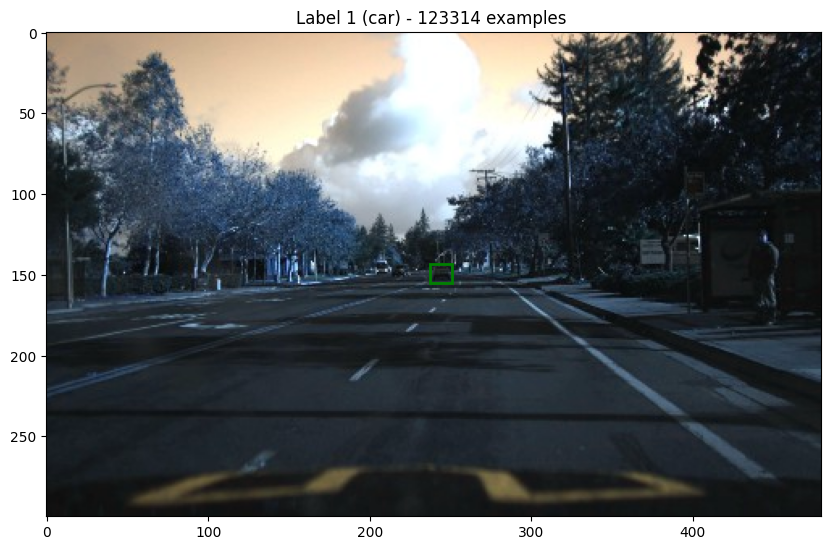

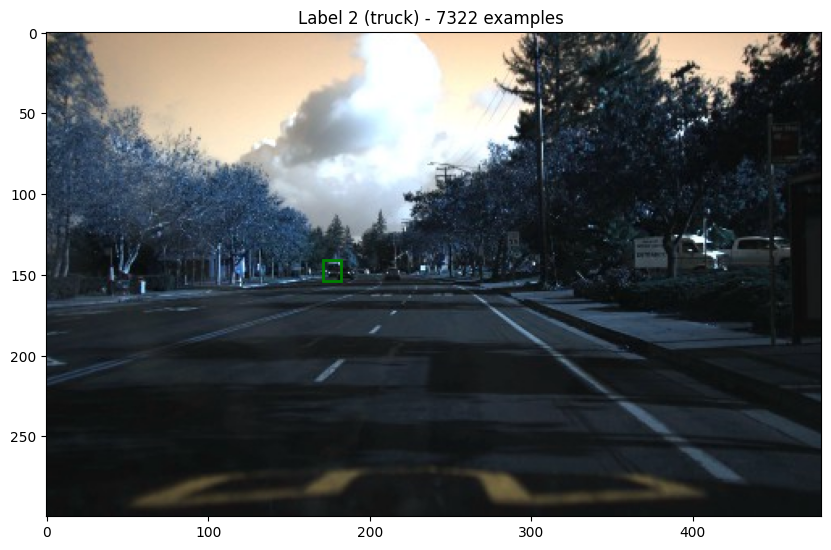

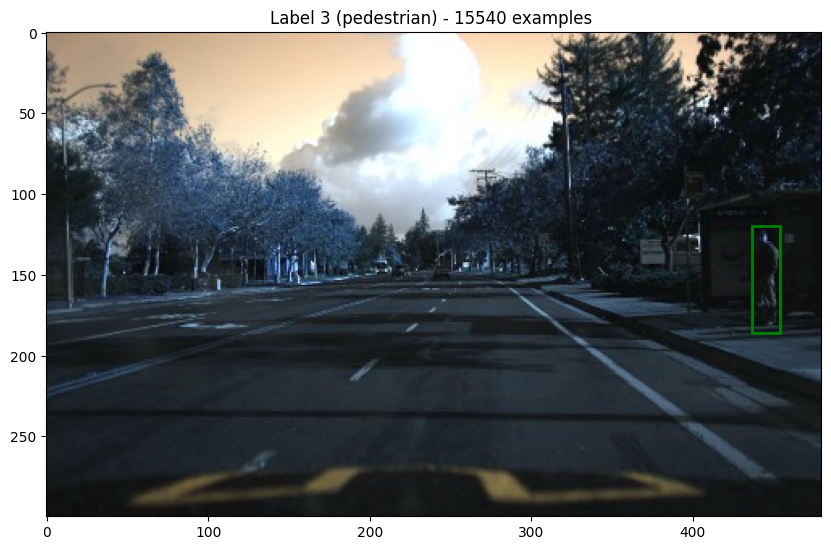

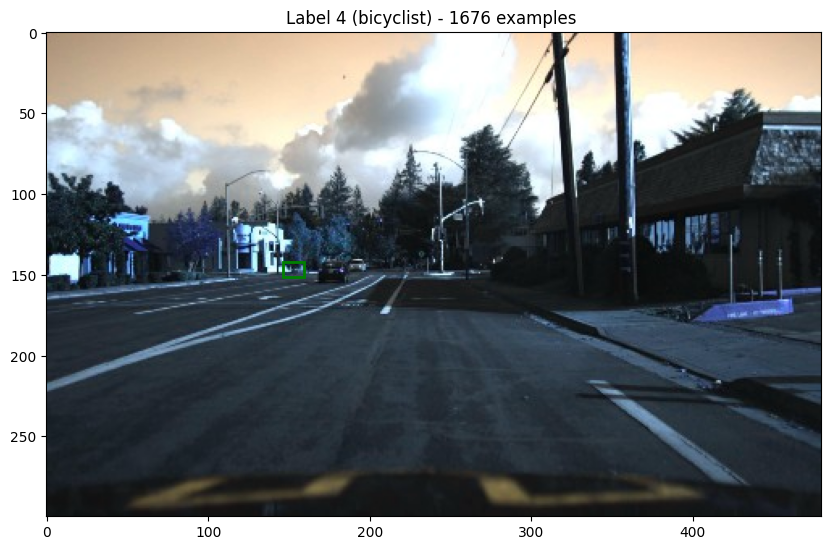

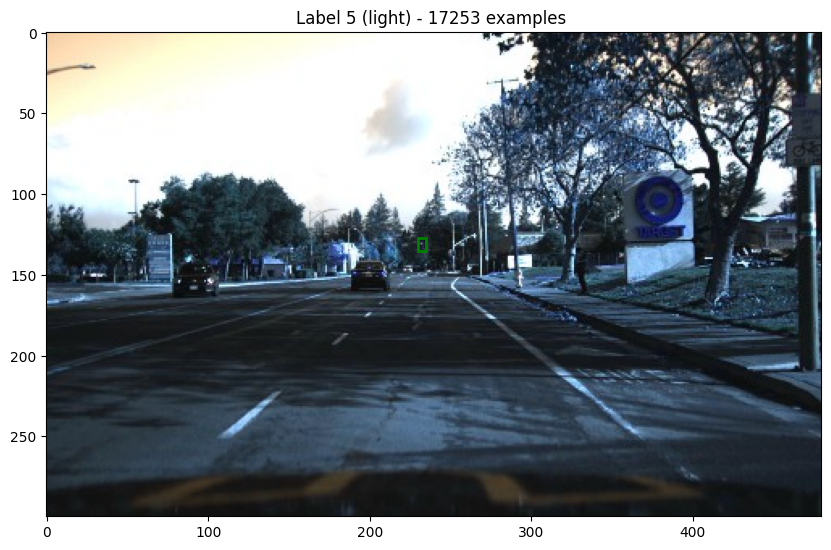

In [29]:
for i in class_counts:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(10, 10))
    plt.title("Label {0} ({1}) - {2} examples ".format(i, labels[i], class_counts[i]))
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))
    
    plt.show()

In [30]:
images[1].shape

(300, 480, 3)

In [ ]:
def new_df(df):
    for (i, fname) in a:
        fpath = f'/content/files/images/{fname}'
        img = np.asarray(Image.open(fpath))
        h ,w ,_ = img.shape
        df.iloc[i, 1] /= w  # xmin
        df.iloc[i, 2] /= w  # xmax
        df.iloc[i, 3] /= h  # ymin
        df.iloc[i, 4] /= h  # ymax
    return df 
df1 = new_df(df)
df1.head()

In [ ]:
# df1 = df1[df1['xmin']>=0.1]
# df1 = df1[df1['xmax']>=0.1]
# df1 = df1[df1['ymin']>=0.1]
# df1 = df1[df1['ymax']>=0.1]

In [ ]:
df1.info()

In [ ]:
img_id = '1478732595079673268.jpg'
img_details = df1[df1['frame']==img_id]
img_details

In [ ]:
import cv2
import torch
import torchvision

In [ ]:
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/components.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/fpn.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/mobilenetv3.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/backbones/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/coco_eval.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/coco_utils.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/engine.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/transforms.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/reference/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/training/train.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/training/utils.py

%load /content/drive/MyDrive/TRG-net-master/trgnet/anchor.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/data.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/grpm.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/misc.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/roi_heads.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/rpn.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/timer.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/trg.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/utils.py
%load /content/drive/MyDrive/TRG-net-master/trgnet/zoo.py

%load /content/drive/MyDrive/TRG-net-master/setup.py

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/TRG-net-master')

In [ ]:
import time

import cv2
import torch
import torchvision
import torchvision.transforms as transforms

from imutils.video import VideoStream
from PIL import Image

from trgnet.zoo import trgnet_mobilenet_v3_large
from trgnet.data import Kitti

video = True
use_grpm = True
grpm_show_output = True

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

In [ ]:
def preprocess_image(img):
  img = torch.tensor(img).permute(2,0,1)
  return img.to(device).float()

In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
class SelfDrivingCarDataset(Dataset):
  w , h = 224 , 224
  def __init__(self , df  , image_root_dir = '/content/files/images' ):
    self.image_dir = image_root_dir
    self.df = df
    self.files = glob.glob(self.image_dir + '/*.jpg')
    self.image_infos = df.frame.unique()

  def __len__(self):
    return len(self.image_infos)

  def __getitem__(self ,ix ):
    img_id = self.image_infos[ix]
    img_path = f'/content/files/images/{img_id}'
    img = Image.open(img_path).convert('RGB')
    img = np.array(img.resize((self.w ,self.h) , resample = Image.BILINEAR))/255.
    data = df[df['frame'] == img_id]
    labels = data['class_id'].values.tolist()
    data = data[['xmin', 'ymin' ,'xmax' ,'ymax']].values
    data[:,[0,2]] *=  self.w
    data[:,[1,3]] *=  self.h
    boxes = data.astype(np.uint32).tolist()
    target = {}
    target["boxes"] = torch.Tensor(boxes).float()
    target["labels"] = torch.Tensor([i for i in labels]).long()
    img = preprocess_image(img)
    return img , target 

  def collate_fn(self ,batch):
    return tuple(zip(*batch))

from sklearn.model_selection import train_test_split as tts

x, test_ids = tts(df1.frame.unique(), test_size = 0.15, random_state = 99)  # test size will be 15%
trn_ids, val_ids = tts(x, train_size = 0.8225, random_state = 99)  # train size will be 70%, val 15%

trn_df, val_df, test_df = df1[df1['frame'].isin(trn_ids)], df1[df1['frame'].isin(val_ids)], df1[df1['frame'].isin(test_ids)]

train_ds = SelfDrivingCarDataset(trn_df)
val_ds = SelfDrivingCarDataset(val_df)
test_ds = SelfDrivingCarDataset(test_df)

train_loader = DataLoader(train_ds,  batch_size = 4, collate_fn = train_ds.collate_fn, drop_last =True)
val_loader = DataLoader(val_ds, batch_size = 4, collate_fn = val_ds.collate_fn, drop_last = True)
test_loader = DataLoader(test_ds, batch_size = 4, collate_fn = test_ds.collate_fn, drop_last = True)

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

In [ ]:
model = trgnet_mobilenet_v3_large(
    pretrained=False, grpm_min_area=50, grpm_lr=0.01, 
    grpm_show_output=grpm_show_output).to(device)

# from torchviz import make_dot
# batch = next(iter(train_loader))
# x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=True).to(device)
# # batch[1]
# print(batch[0])
# # make_dot(model(batch[0]))
# y = model(batch[0])

# make_dot(y.mean())

In [ ]:
model.eval()

In [ ]:
def train_batch(inputs, model , optimizer):
  model.train()
  input , targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  optimizer.zero_grad()
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  loss.backward()
  optimizer.step()
  return loss, losses 

@torch.no_grad()
def validate_batch(inputs, models):
  input, targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  return loss, losses

@torch.no_grad()
def test_batch(inputs, models):
  input, targets = inputs 
  input = list(image.to(device) for image in input)
  targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  return loss, losses

In [ ]:
optimizer = torch.optim.SGD(model.parameters() , lr=0.005 , 
                            momentum = 0.9 , weight_decay= 0.0005 )

In [ ]:
loss_criterions = ['loss_classifier',
          'loss_box_reg',
          'loss_objectness',
          'loss_rpn_box_reg'] 

EPOCHS = 5

In [ ]:
# import time 
# start = time.time()
# tcl , trl , tol , trpnl ,ttl = [] ,[] ,[] ,[] ,[] 
# vcl , vrl , vol , vrpnl ,vtl = [] ,[] ,[] ,[] ,[] 
# # tcl , vrl , vol , vrpnl ,vtl = [] ,[] ,[] ,[] ,[] 
# for epoch in range(EPOCHS):
#   print(f'EPOCH {epoch+1}')
#   tecl , terl , teol , terpnl ,tetl = [] ,[] ,[] ,[] ,[] 
#   vecl , verl , veol , verpnl ,vetl = [] ,[] ,[] ,[] ,[]
#   for ix , batch in enumerate(train_loader):
#     loss , losses = train_batch(batch , model , optimizer )
#     los_loss , reg_loss , loss_obj , loss_rpn_box_reg = [losses[k] for k in  loss_criterions]
#     tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
#     tecl.append(los_loss.detach().cpu().numpy()) , terl.append(reg_loss.detach().cpu().numpy()) , teol.append(loss_obj.detach().cpu().numpy()) 
#     terpnl.append(loss_rpn_box_reg.detach().cpu().numpy()) ,tetl.append(tot_loss.detach().cpu().numpy())
#     if ix%600 == 0 and ix!=0:
#         print(f'{ix} batches completed')
#   print(f'Training - Total Loss {np.mean(tetl):.5f} | Classification Loss {np.mean(tecl):.5f} | Regression Loss {np.mean(terl):.5f} ',end=" ")
#   print(f'| Object Loss {np.mean(teol):.5f} | RPN Loss {np.mean(terpnl):.5f}' )
#   tcl.append(np.mean(tecl)) , trl.append(np.mean(terl)) , tol.append(np.mean(teol)) , trpnl.append(np.mean(terpnl)) ,ttl.append(np.mean(tetl))


#   for ix , batch in enumerate(val_loader):
#     loss , losses = validate_batch(batch ,model )
#     los_loss , reg_loss , loss_obj , loss_rpn_box_reg = [losses[k] for k in  loss_criterions]
#     tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
#     vecl.append(los_loss.detach().cpu().numpy()) , verl.append(reg_loss.detach().cpu().numpy()) , veol.append(loss_obj.detach().cpu().numpy()) 
#     verpnl.append(loss_rpn_box_reg.detach().cpu().numpy()) ,vetl.append(tot_loss.detach().cpu().numpy())
  
#   print(f'Validation - Total Loss {np.mean(vetl):.5f} | Classification Loss {np.mean(vecl):.5f} | Regression Loss {np.mean(verl):.5f} ',end=" ")
#   print(f'| Object Loss {np.mean(veol):.5f} | RPN Loss {np.mean(verpnl):.5f}' )

#   vcl.append(np.mean(vecl)) , vrl.append(np.mean(verl)) , vol.append(np.mean(veol)) , vrpnl.append(np.mean(verpnl)) ,vtl.append(np.mean(vetl))

#   print('===============================================================================Done')
#   print()
# print('                    ****************** Training Completed *****************                             ')
# end = time.time()
# total_time = end-start

In [ ]:
import time

start = time.time()
train_cl, train_rl, train_ol, train_rpnl, train_tl = [], [], [], [], []
val_cl, val_rl, val_ol, val_rpnl, val_tl = [], [], [], [], []
test_cl, test_rl, test_ol, test_rpnl, test_tl = [] ,[] ,[] ,[] ,[]
for epoch in range(EPOCHS):
    print(f'EPOCH {epoch + 1}')
    train_epoch_cl, train_epoch_rl, train_epoch_ol, train_epoch_rpnl, train_epoch_tl = [], [], [], [], []
    val_epoch_cl, val_epoch_rl, val_epoch_ol, val_epoch_rpnl, val_epoch_tl = [], [], [], [], []
    test_epoch_cl, test_epoch_rl, test_epoch_ol, test_epoch_rpnl, test_epoch_tl = [], [], [], [], []
    for ix, batch in enumerate(train_loader):
        loss, losses = train_batch(batch, model, optimizer)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        train_epoch_cl.append(los_loss.detach().cpu().numpy()), train_epoch_rl.append(reg_loss.detach().cpu().numpy()), train_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        train_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), train_epoch_tl.append(tot_loss.detach().cpu().numpy())
        if ix % 600 == 0 and ix != 0:
            print(f'{ix} batches completed')
    print(
        f'Training - Total Loss {np.mean(train_epoch_tl):.5f} | Classification Loss {np.mean(train_epoch_cl):.5f} | Regression Loss {np.mean(train_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(train_epoch_ol):.5f} | RPN Loss {np.mean(train_epoch_rpnl):.5f}')
    train_cl.append(np.mean(train_epoch_cl)), train_rl.append(np.mean(train_epoch_rl)), train_ol.append(np.mean(train_epoch_ol)), train_rpnl.append(
        np.mean(train_epoch_rpnl)), train_tl.append(np.mean(train_epoch_tl))

    for ix, batch in enumerate(val_loader):
        loss, losses = validate_batch(batch, model)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        val_epoch_cl.append(los_loss.detach().cpu().numpy()), val_epoch_rl.append(reg_loss.detach().cpu().numpy()), val_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        val_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), val_epoch_tl.append(tot_loss.detach().cpu().numpy())

    print(
        f'Validation - Total Loss {np.mean(val_epoch_tl):.5f} | Classification Loss {np.mean(val_epoch_cl):.5f} | Regression Loss {np.mean(val_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(val_epoch_ol):.5f} | RPN Loss {np.mean(val_epoch_rpnl):.5f}')

    val_cl.append(np.mean(val_epoch_cl)), val_rl.append(np.mean(val_epoch_rl)), val_ol.append(np.mean(val_epoch_ol)), val_rpnl.append(
        np.mean(val_epoch_rpnl)), val_tl.append(np.mean(val_epoch_tl))
    
    
    for ix, batch in enumerate(val_loader):
        loss, losses = test_batch(batch, model)
        los_loss, reg_loss, loss_obj, loss_rpn_box_reg = [losses[k] for k in loss_criterions]
        tot_loss = los_loss + reg_loss + loss_obj + loss_rpn_box_reg
        test_epoch_cl.append(los_loss.detach().cpu().numpy()), test_epoch_rl.append(reg_loss.detach().cpu().numpy()), test_epoch_ol.append(
            loss_obj.detach().cpu().numpy())
        test_epoch_rpnl.append(loss_rpn_box_reg.detach().cpu().numpy()), test_epoch_tl.append(tot_loss.detach().cpu().numpy())

    print(
        f'Testing - Total Loss {np.mean(test_epoch_tl):.5f} | Classification Loss {np.mean(test_epoch_cl):.5f} | Regression Loss {np.mean(test_epoch_rl):.5f} ',
        end=" ")
    print(f'| Object Loss {np.mean(test_epoch_ol):.5f} | RPN Loss {np.mean(test_epoch_rpnl):.5f}')


    test_cl.append(np.mean(test_epoch_cl)), test_rl.append(np.mean(test_epoch_rl)), test_ol.append(np.mean(test_epoch_ol)), test_rpnl.append(
        np.mean(test_epoch_rpnl)), test_tl.append(np.mean(test_epoch_tl))
    print('=============================================================================== Done')
    print()
print('                    ****************** Training Completed *****************                             ')
end = time.time()
total_time = end - start

In [ ]:
print(f'Total Time Taken : {total_time} seconds')

In [ ]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
def plot_pf(tl, vl, head):
    plt.plot(epochs, tl, 'b', label='Training loss')
    plt.plot(epochs, vl, 'r', label='Validation loss')
    plt.title(head)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid('off')
    plt.show()

In [ ]:
plot_pf(train_tl, val_tl, "Total Loss")

In [ ]:
plot_pf(train_cl, val_cl, 'Classification loss')

In [ ]:
plot_pf(train_rl, val_rl, "Regression Loss")

In [ ]:
plot_pf(train_rpnl, val_rpnl, "Region Proposal Network Loss")

In [ ]:
plot_pf(train_ol, val_ol, "Object Loss")

In [ ]:
print(f'''
Training Classification Loss = {train_cl}  
Training Regression Loss = {train_rl} 
Training Object Loss = {train_ol} 
Training Region Proposal Network Loss = {train_rpnl} 
Training Total Loss = {train_tl}''')

In [ ]:
print(f'''
Validation Classification Loss = {val_cl}  
Validation Regression Loss = {val_rl} 
Validation Object Loss  = {val_ol} 
Validation Region Proposal Network Loss = {val_rpnl} 
Validation Total Loss = {val_tl}''')

In [ ]:
print(f'''
Testing Classification Loss = {test_cl}  
Testing Regression Loss = {test_rl} 
Testing Object Loss = {test_ol} 
Testing Region Proposal Network Loss = {test_rpnl} 
Testing Loss = {test_tl}''')

In [ ]:
from IPython.display import display

In [ ]:
!pip install torch_snippets

In [ ]:
from torchvision.ops import nms
from torch_snippets import *

def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16)
    labels = np.array([target2labels[i] for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy()
    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.05)
    bbs, confs, labels = [tensor[ixs] for tensor in [bbs, confs, labels]]

    if len(ixs) == 1:
        bbs, confs, labels = [np.array([tensor]) for tensor in [bbs, confs, labels]]
    return bbs.tolist(), confs.tolist(), labels.tolist()

model.eval()
for ix, (images, targets) in enumerate(val_loader):
    if ix==3: break
    images = [im for im in images]
    outputs = model(images)
    print(outputs)
    for ix, output in enumerate(outputs):
       bbs, confs, labels = decode_output(output)
       info = [f'{l}@{c:.2f}' for l,c in zip(labels, confs)]
       show(images[ix].cpu().permute(1,2,0), bbs=bbs, texts=labels, sz=5)

In [ ]:
import matplotlib.patches as patches
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
    for box in (target['boxes']):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

In [ ]:
from torchvision import transforms as torchtrans  

# the function takes the original prediction and the iou threshold.

def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')



In [ ]:
img, target = test_ds[0][0], test_ds[0][1]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])[0]
print('EXPECTED OUTPUT\n')
plot_img_bbox(torch_to_pil(img), target)
print('MODEL OUTPUT\n')
nms_prediction = apply_nms(prediction, iou_thresh=0.01)

plot_img_bbox(torch_to_pil(img), nms_prediction)

In [ ]:
test_ds[0][1]